In [1]:
%config Completer.use_jedi = False

import sys
sys.path.append('../../ACORE-LFI/')
sys.path.append('../../ACORE-LFI/acore/')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from toy_gauss_acore import generate_data, plot_data
from models.muon_features import MuonFeatures
from acore_ada import ACORE

# Construct confidence intervals for $\theta$ with ACORE

In [3]:
data = generate_data(sample_size=2000, lower_mu=-50, higher_mu=50, scale=5, split=False)

In [4]:
model = MuonFeatures(data=data, 
                     t0_grid_granularity=100, 
                     true_param_low=0, 
                     true_param_high=1, 
                     param_dims = 1,
                     observed_dims=2, 
                     observed_sample_fraction=0.05,
                     reference_g='marginal',
                     param_column=0, 
                     debug=True)

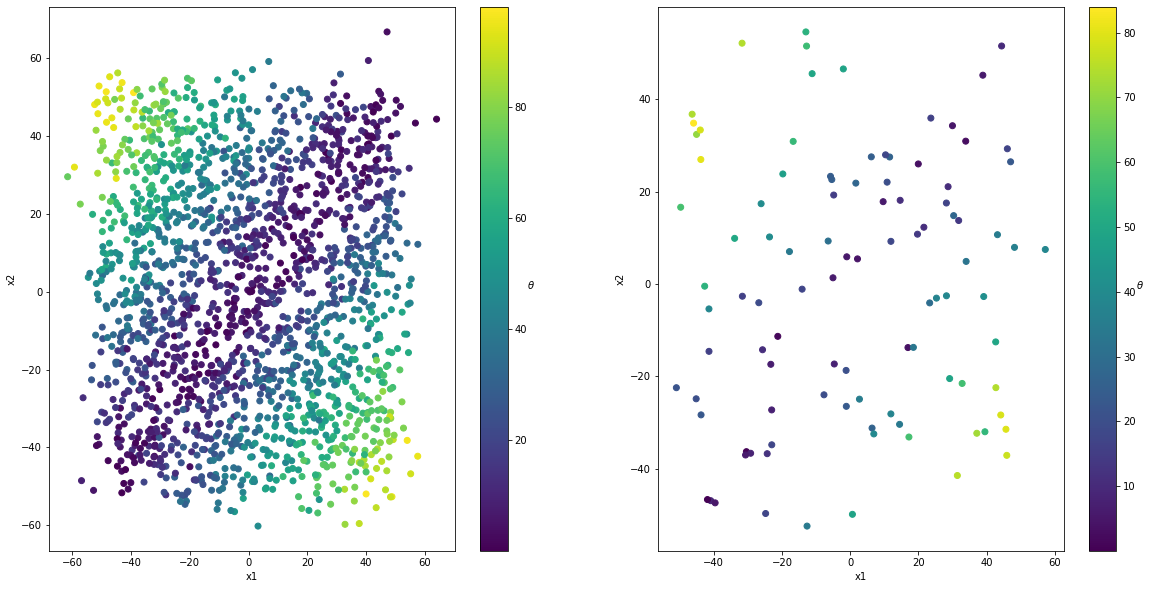

In [5]:
plot_data(train_set=model.train_set, test_set=np.hstack((model.obs_param.reshape(-1, 1),model.obs_x)))

In [6]:
acore = ACORE(model=model, 
              b=1000, 
              b_prime=1000, 
              alpha=0.05, 
              classifier_or='MLP', 
              classifier_qr='xgb_d3_n100', 
              sample_size_obs=1, 
              debug=True)

In [7]:
acore.model.train_set_left.shape, acore.model.train_set.shape, acore.model.obs_x.shape, acore.model.obs_param.shape

((1900, 3), (1900, 3), (100, 2), (100,))

In [8]:
acore.confidence_band()

----- MLP Trained


Calculate Odds: 100%|██████████| 10000/10000 [00:23<00:00, 427.21it/s]

----- Training Quantile Regression Algorithm


----- Creating Confidence Band


In [9]:
df = acore.plot_confidence_band(return_df=True)

In [10]:
df

,obs_theta,lower,upper,covered
0,53.572815,0.0,1.0,True
1,13.966150,0.0,1.0,True
2,25.106426,0.0,1.0,True
3,33.962100,0.0,1.0,True
4,34.126816,0.0,1.0,True
...,...,...,...,...
95,58.922371,0.0,1.0,True
96,50.207392,0.0,1.0,True
97,11.398509,0.0,1.0,True
98,11.370183,0.0,1.0,True


In [ ]:
df